(3000, 2)
(3000,) 0 2
(2400, 2)
(300, 2)
(300, 2)
uint8


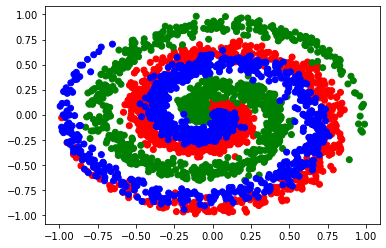

In [1]:
from matplotlib import pyplot as plt
from NNImplementation import BasicClasses as cls, ModelClassIntegration
from nnfs.datasets import spiral_data
from NNImplementation.ModelClassIntegration import Model
from sklearn.model_selection import train_test_split

import numpy as np

X, Y = spiral_data(1000, 3)


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle= True, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.111, shuffle= True, random_state = 42)

print(np.shape(X))
print(np.shape(Y), np.min(Y), np.max(Y))
print(np.shape(x_train))
print(np.shape(x_valid))
print(np.shape(x_test))

print(Y.dtype)

Y_color = ['red' if Y[i] == 0 else 'green' if Y[i]== 1  else 'blue' for i in range(len(Y))]

plt.scatter(X[...,0], X[...,1], color=Y_color)



In [4]:
#_________________________________________________________________
#
#                   Keras Implementation
#
#_________________________________________________________________

from keras.layers import Dense, Input
from keras.models import Model
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

input_layer = Input((2, ))
d1 = Dense(512, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='relu')(input_layer)
d2 = Dense(512, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='relu')(d1)
output_layer = Dense(3, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='softmax')(d2)

moldel_keras = Model(inputs=input_layer, outputs=output_layer)
moldel_keras.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate=0.001))

moldel_keras.fit(x=x_train, y=y_train, batch_size=64, epochs=200, validation_data=(x_valid, y_valid))


Epoch 1/100
38/38 [==============================] - 2s 35ms/step - loss: 1.2571 - val_loss: 1.2046
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 1.1502 - val_loss: 1.1311
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 1.1098 - val_loss: 1.1029
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0958 - val_loss: 1.1035
Epoch 5/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0851 - val_loss: 1.0926
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0769 - val_loss: 1.0890
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0673 - val_loss: 1.0760
Epoch 8/100
38/38 [==============================] - 0s 11ms/step - loss: 1.0559 - val_loss: 1.0572
Epoch 9/100
38/38 [==============================] - 1s 19ms/step - loss: 1.0402 - val_loss: 1.0404
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 1.0213 - val_loss: 1.0223
Epoc

10/10 [==============================] - 0s 7ms/step
(300, 3)
(300,)


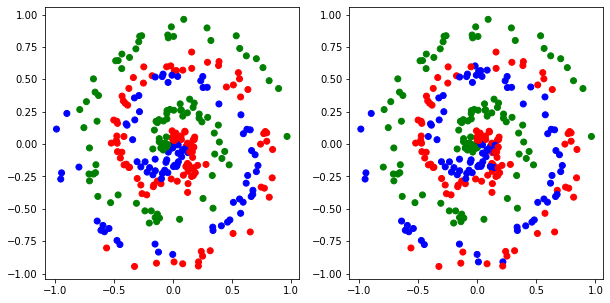

In [19]:
test_prediction = moldel_keras.predict(x_test)

print(np.shape(test_prediction))
test_prediction = np.argmax(test_prediction, axis=-1)
print(np.shape(test_prediction))


test_prediction_color = ['red' if test_prediction[i] == 0 else 'green' if test_prediction[i]== 1  else 'blue' for i in range(len(test_prediction))]
y_test_color = ['red' if y_test[i] == 0 else 'green' if y_test[i]== 1  else 'blue' for i in range(len(y_test))]


fig= plt.figure( figsize = (10, 5))
fig.add_subplot(1, 2, 1)
plt.scatter(x_test[...,0], x_test[...,1], c=test_prediction_color)

fig.add_subplot(1, 2, 2)
plt.scatter(x_test[...,0], x_test[...,1], c=y_test_color)


In [30]:
%load_ext autoreload
%autoreload 2
from NNImplementation import BasicClasses as cls, ModelClassIntegration
from NNImplementation.ModelClassIntegration import Model

model_NNFS = Model()

model_NNFS.add_layer(cls.Layer(2, 512, l2_biases_regularization=5e-4, l2_weights_regularization=5e-4), trainable_layer=True)
model_NNFS.add_layer(cls.ActivationReLU())
model_NNFS.add_layer(cls.Layer(512,512,l2_biases_regularization=5e-4, l2_weights_regularization= 5e-4),trainable_layer=True)
model_NNFS.add_layer(cls.ActivationReLU())
model_NNFS.add_layer(cls.Layer(512, 3), trainable_layer=True)
model_NNFS.add_layer(cls.ActivationSoftmax())

model_NNFS.set(optimizer=cls.OptimizerAdam(0.02, decay=5e-4, beta_2=0.999),
          loss=cls.CategoricalCrossEntropyLossFunction(),
          loss_softmax_merge=cls.CategoricalCrossEntropySoftmaxActivation())

model_NNFS.train(X=x_train, Y=y_train, batch_size=64, epochs=200,
            print_every=10, X_validation=x_valid,
            Y_validation=y_valid, regularization_loss_on=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
_____________________________________________
Epoch  0
Current loss is:  1.1431231952373273
Current validation loss is:  1.1191292116240188
_____________________________________________
_____________________________________________
Epoch  10
Current loss is:  0.6879374464563976
Current validation loss is:  0.6051496765949114
_____________________________________________
_____________________________________________
Epoch  20
Current loss is:  0.564659775427022
Current validation loss is:  0.47598606878311406
_____________________________________________
_____________________________________________
Epoch  30
Current loss is:  0.4817356354259727
Current validation loss is:  0.4345656004689553
_____________________________________________
_____________________________________________
Epoch  40
Current loss is:  0.4341948924088843
Current validation loss is:  0.4031796652934896
________________________

(300, 3)
(300,)


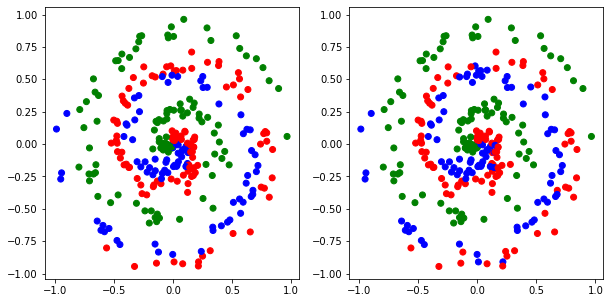

In [32]:
test_prediction = model_NNFS.forward(x_test)

print(np.shape(test_prediction))
test_prediction = np.argmax(test_prediction, axis=-1)
print(np.shape(test_prediction))


test_prediction_color = ['red' if test_prediction[i] == 0 else 'green' if test_prediction[i]== 1  else 'blue' for i in range(len(test_prediction))]
y_test_color = ['red' if y_test[i] == 0 else 'green' if y_test[i]== 1  else 'blue' for i in range(len(y_test))]


fig= plt.figure( figsize = (10, 5))
fig.add_subplot(1, 2, 1)
plt.scatter(x_test[...,0], x_test[...,1], c=test_prediction_color)

fig.add_subplot(1, 2, 2)
plt.scatter(x_test[...,0], x_test[...,1], c=y_test_color)